In [32]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [33]:
# Load the saved pipeline
loaded_pipeline = joblib.load('model_pipeline.pkl')

In [34]:
# Load data
data_file_path = '../dataset/secom.data'
labels_file_path = '../dataset/secom_labels.data'

data = pd.read_csv(data_file_path, sep='\s+', header=None)
labels = pd.read_csv(labels_file_path, sep='\s+', header=None, usecols=[0])
labels = labels[0].apply(lambda x: 1 if x == -1 else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)

In [35]:
# Predict on the test set
y_pred = loaded_pipeline.predict(X_test)

In [36]:
# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report)

print("\nAccuracy Score:")
print(accuracy)

Confusion Matrix:
[[  0  31]
 [  3 437]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.93      0.99      0.96       440

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471


Accuracy Score:
0.9278131634819533


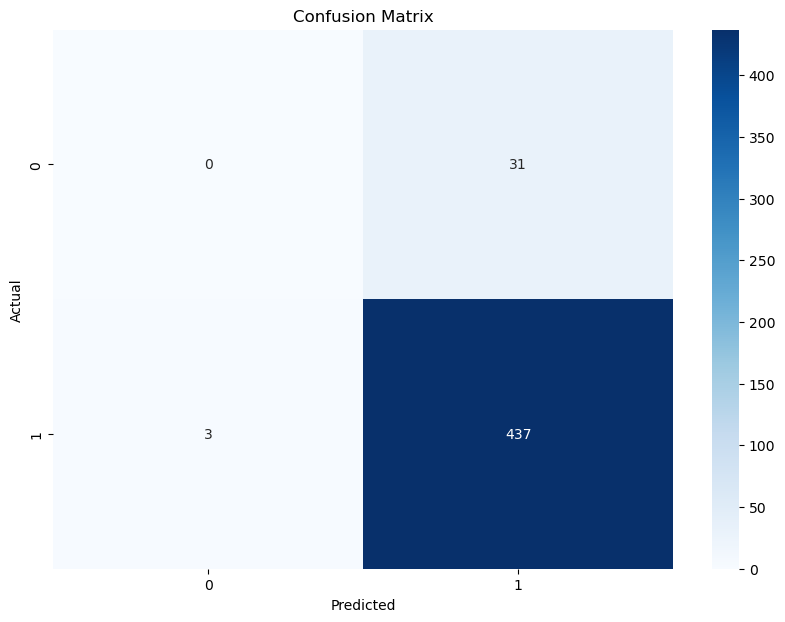

In [37]:
# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Predict on new data
new_data = X_test[:10]
predictions = loaded_pipeline.predict(new_data)
prediction_probs = loaded_pipeline.predict_proba(new_data)[:, 1]

In [39]:
# Create a DataFrame to save the results
results_df = pd.DataFrame(new_data)
results_df['Predicted_Label'] = predictions
results_df['Probability_Class_1'] = prediction_probs

In [40]:
# Save predictions to a CSV file
results_df.to_csv('predictions.csv', index=False)


In [41]:
print("\nPredictions on New Data:")
print(results_df)


Predictions on New Data:
            0        1          2          3       4      5         6       7  \
1090  3009.94  2524.62  2200.2000  1121.1875  1.3171  100.0  103.8978  0.1191   
1154  3171.54  2435.85  2168.7000   895.5849  0.8484  100.0  108.0122  0.1241   
723   2964.83  2516.95  2210.9778  1572.4698  1.0204  100.0  106.2089  0.1222   
811   3042.85  2403.21  2204.5445  2076.6730  1.0961  100.0   95.9222  0.1251   
670   2979.86  2545.48  2229.3333  1553.3158  1.5123  100.0  102.7800  0.1235   
930   3037.62  2431.93  2194.9556  2341.7833  2.3917  100.0   86.8100  0.1231   
1140  2972.00  2555.27        NaN        NaN     NaN    NaN       NaN     NaN   
1287  3007.39  2504.01  2209.8000  1175.5508  1.1464  100.0  112.1367  0.1227   
1282  2927.71  2525.39  2199.6556  1140.3983  1.3369  100.0  103.0967  0.1227   
76    2918.90  2500.41  2183.4333  1582.5646  1.3601  100.0   99.0267  0.1240   

           8       9  ...     582     583     584     585     586     587  \
1090 